# 第13章 さまざまな予測性能評価

### 回帰の予測性能評価

**問1**  
回帰の予測性能に関して、コメントに従い実装してください

(1)  
cinema.csvでさまざまな性能評価を試します。  
コード13-1の内容で回帰モデルを作成してください。

In [ ]:
# コード13-1の内容の通り
import pandas as pd

# 欠損値があるままでは学習できないので欠損値処理だけ行う
df = pd.read_csv('cinema.csv')
df = df.fillna(df.mean())
x = df.loc[:, 'SNS1':'original']
t = df['sales']
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, t)

LinearRegression()

▶実行結果  
LinearRegression()

参考箇所  
コード13-1 データとモデルの準備(P460)

(2)  
訓練データでMAE、MSE、RMSEを計算してください
* 平均絶対誤差 MAE
* 平均2乗誤差 MSE
* 2乗平均平方根誤差 RMSE

In [ ]:
# mean_absolute_errorをインポート
from sklearn.metrics import mean_absolute_error

# mean_squared_errorをインポート
from sklearn.metrics import mean_squared_error

# mathをインポート
import math

# 訓練データでの予測結果をpredに代入
pred = model.predict(x)

# MAEを計算し、表示する
print('mae:{}'.format(mean_absolute_error(pred, t)))

# MSEを計算し、表示する
print('mse:{}'.format(mean_squared_error(pred, t)))

# RMSEを計算し、表示する
print('rmse:{}'.format(math.sqrt(mean_squared_error(pred, t))))

mae:308.1971325288456
mse:151986.03957624518
rmse:389.85386951554705


▶実行結果  
mae:308.1971325288456  
mse:151986.03957624518  
rmse:389.85386951554705  

参考箇所  
コード13-2 平均2乗誤差(MSE)を計算する(P460)  
コード13-3 2乗平均平方根誤差(RMSE)の計算(P462)  
コード13-4 予測結果と実際の誤差を検証する(P463)

(4)  
予測結果と実際の値を自分で作って、RMSEとMAEを比較する

In [ ]:
# 予測結果をリストで作成
yosoku = [2, 3, 5, 7, 11, 13]

# 実際の結果をリストで作成
target = [3, 5, 8, 11, 16, 19]

# MSEを計算する
mse = mean_squared_error(yosoku, target)

# RMSEを計算し、表示する
print('rmse:{}'.format(math.sqrt(mse)))

# MAEを計算し、表示する
print('mae:{}'.format(mean_absolute_error(yosoku, target)))

rmse:3.8944404818493075
mae:3.5


▶実行結果  
rmse:3.8944404818493075  
mae:3.5

参考箇所  
コード13-4 予測結果と実際の誤差を検証する(P463)

(5)  
外れ値が混入した場合のRMSEとMAEを比較する

In [ ]:
# 予測結果をリストで作成
yosoku = [2, 3, 5, 7, 11, 13, 46] # 実際には23だけど46と予測したとする

# 実際の結果をリストで作成
target = [3, 5, 8, 11, 16, 19, 23]

# MSEを計算する
mse = mean_squared_error(yosoku, target)

# RMSEを計算し、表示する
print('rmse:{}'.format(math.sqrt(mse)))

# MAEを計算し、表示する
print('mae:{}'.format(mean_absolute_error(yosoku, target)))

rmse:9.411239481143202
mae:6.285714285714286


▶実行結果  
rmse:9.411239481143202  
mae:6.285714285714286

参考箇所  
コード13-4 予測結果と実際の誤差を検証する(P463)

### 分類の予測性能評価

**問2**  
分類の予測性能に関して、コメントに従い実装してください

(1)  
Survived.csvで性能評価を試します。  
コード13-5、13-6の内容でモデルを作成してください。

In [ ]:
# コード13-5、コード13-6の内容を引用する
# panda、treeのインポート
import pandas as pd
from sklearn import tree

# データの読み込み
df = pd.read_csv('Survived.csv')

# 欠損値を平均値で穴埋め
df = df.fillna(df.mean())

# 特徴量('Pclass'、'Age') と 正解データ('Survived')に分割
X = df[['Pclass', 'Age']]
y = df['Survived']

# 深さ2の決定木モデルを作成
model = tree.DecisionTreeClassifier(max_depth = 2, random_state = 0)

# すべてのデータで学習
model.fit(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


DecisionTreeClassifier(max_depth=2, random_state=0)

▶実行結果  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  \# Remove the CWD from sys.path while we load stuff.  
DecisionTreeClassifier(max_depth=2, random_state=0)

参考箇所  
コード13-5 データの準備(P468)  
コード13-6 モデルの準備(P469)

(2)  
上記のモデルで、再現率、適合率、f1-scoreを計算して表示してください。  
計算結果は辞書型で取得してください。  

In [ ]:
# classification_reportをインポートする
from sklearn.metrics import classification_report

# 上記モデルで特徴量xに対する予測結果を取得し、predに代入する
pred = model.predict(X)

# 再現率と適合率をディクショナリ型で取得し、out_putへ代入する　
out_put = classification_report(y_pred = pred , y_true = y, output_dict = True)

# out_putをデータフレームに変換して出力する　
pd.DataFrame(out_put)

,0,1,accuracy,macro avg,weighted avg
precision,0.778742,0.558140,0.672278,0.668441,0.694066
recall,0.653916,0.701754,0.672278,0.677835,0.672278
f1-score,0.710891,0.621762,0.672278,0.666326,0.676680
support,549.000000,342.000000,0.672278,891.000000,891.000000


▶実行結果  
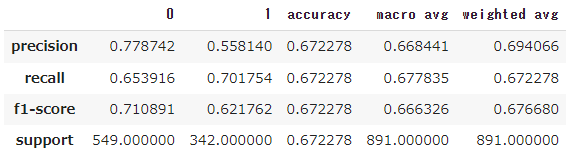

参考箇所  
コード13-7 再現率と適合率を一括で計算(P469)  
コード13-8 classification_report関数にパラメータ引数を指定(P470)

### k分割交差検証

#### 回帰モデルで分割条件を指定する

**問3**  
回帰モデルでK分割交差検証を行います。コメントに従い実装してください

(1)  
cinema.csvで交差検証を試します。  
コード13-9の内容で欠損値の穴埋め、特徴量と正解データの分割を実施してください。

In [ ]:
# コード13-9の内容の通り
df = pd.read_csv('cinema.csv')

# 学習できないので欠損値処理だけ行う
df = df.fillna(df.mean())
x = df.loc[:, 'SNS1':'original']
t = df['sales']

参考箇所  
コード13-9 K分割交差検証のためのデータ準備(P478)

(2)  
上記の特徴量、正解データを使い、LinearRegressionモデルのk分割交差検証を実施してくください。 

In [ ]:
# k分割交差検証(回帰モデル)をインポート
from sklearn.model_selection import KFold
# cross_validateインポート
from sklearn.model_selection import cross_validate

# LinearRegressionをインポート
from sklearn.linear_model import LinearRegression

# KFoldのオブジェクトを作成する
# 分割数は3とする
kf = KFold(n_splits = 3, shuffle = True, random_state = 0)

# 回帰モデルを生成する
model = LinearRegression()

# 交差検証を行い、結果をresultへ代入する
# * 評価指標は'r2(決定係数)'とする
# * 訓練データでの結果も取得する
result = cross_validate(model, x, t, cv = kf, scoring='r2', return_train_score=True)

# 検証結果データ(辞書型)を表示する
print(result)

{'fit_time': array([0.0081501 , 0.00610995, 0.00362659]), 'score_time': array([0.00234151, 0.00180316, 0.00253034]), 'test_score': array([0.72465051, 0.71740834, 0.75975591]), 'train_score': array([0.76928501, 0.76368104, 0.75780074])}


▶実行結果(値は異なって構わない)   
{'fit_time': array([0.00249505, 0.00222754, 0.00203943]), 'score_time': array([0.00162721, 0.0015161 , 0.00148773]), 'test_score': array([0.72465051, 0.71740834, 0.75975591]), 'train_score': array([0.76928501, 0.76368104, 0.75780074])}

参考箇所  
コード13-10 KFoldの処理で分割時の条件を指定(P478)  
コード13-11 cross_validate関数で交差検証を行う(P479)

(3)  
検証結果のtest_scoreの平均値を求めてください

In [ ]:
sum(result['test_score']) / len(result['test_score'])

0.7339382541774343

▶実行結果(値は異なって構わない)  
0.7339382541774343

#### 分類モデルで分割条件を指定する

**問4**  
分類モデルでK分割交差検証を行います。コメントに従い実装してください

(1)  
Survived.csvで交差検証を試します。  
コード13-5の内容で、特徴量、正解データを準備してください。

In [ ]:
# コード13-5の内容の通り
df = pd.read_csv('Survived.csv')
df = df.fillna(df.mean())

x = df[['Pclass', 'Age']]
t = df['Survived']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


参考箇所  
コード13-5 データの準備(P468)

(2)  
上記の特徴量、正解データを使い、決定木モデルのStratifiedK分割交差検証を実施してくください。 

In [ ]:
# StratifiedKFoldをインポート
# from sklearn.model_selection import KFold  分類
from sklearn.model_selection import StratifiedKFold  # 回帰

# cross_validateインポート
from sklearn.model_selection import cross_validate

# 決定木のインポート
from sklearn import tree

# StratifiedKFoldのオブジェクトを作成する
# 分割数は5とする
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

# 深さ2の決定木モデルを作成
model = tree.DecisionTreeClassifier(max_depth = 2, random_state = 0)

# 交差検証を行い、結果をresultへ代入する
# * 評価指標は'accuracy(正解率)'とする
# * 訓練データでの結果も取得する
result = cross_validate(model, x, t, cv = skf, scoring = 'accuracy', return_train_score=True)


# 検証結果データ(辞書型)を表示する
print(result)

{'fit_time': array([0.00802326, 0.00272584, 0.00314283, 0.00267625, 0.00267696]), 'score_time': array([0.00176001, 0.00180411, 0.00181127, 0.00162053, 0.00165606]), 'test_score': array([0.67039106, 0.66853933, 0.61797753, 0.64044944, 0.6011236 ]), 'train_score': array([0.67275281, 0.67321178, 0.69985975, 0.65638149, 0.69004208])}


▶実行結果(値は異なって構わない)  
{'fit_time': array([0.00539517, 0.00284648, 0.0024848 , 0.00243139, 0.00243759]), 'score_time': array([0.00330853, 0.00160408, 0.00150037, 0.00148988, 0.00148702]), 'test_score': array([0.67039106, 0.66853933, 0.61797753, 0.64044944, 0.6011236 ]), 'train_score': array([0.67275281, 0.67321178, 0.69985975, 0.65638149, 0.69004208])}

参考箇所  
コード13-6 モデルの準備(P469)  
コード13-10 KFoldの処理で分割時の条件を指定(P478)  
コード13-11 cross_validate関数で交差検証を行う(P479)

(3)  
検証結果のtest_scoreの平均値を求めてください

In [ ]:
sum(result['test_score']) / len(result['test_score'])

0.6396961898185927

▶実行結果(値は異なって構わない)  
0.6396961898185927